# StyleGAN Evaluation

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
import torch.utils.data

import os
from PIL import Image
import numpy as np

from torchvision.models.inception import inception_v3
import numpy as np
from scipy.stats import entropy

In [ ]:
from inception_score import inception_score

In [ ]:
def load_images_from_directory(directory, start_idx=0, end_idx=20):
    """Load images from directory, convert them to 3xHxW numpy arrays normalized in the range [-1, 1]."""
    images = []
    for idx in range(start_idx, end_idx + 1):
        image_name = f'fakes{idx:06d}.png'
        image_path = os.path.join(directory, image_name)
        if os.path.exists(image_path):
            with Image.open(image_path) as img:
                img = img.convert('RGB')  # Ensure image is RGB
                # Convert image to numpy array and normalize to [-1, 1]
                np_img = np.array(img, dtype=np.float32) / 127.5 - 1.0
                # Rearrange the array dimensions to be (3, H, W)
                np_img = np_img.transpose(2, 0, 1)
                images.append(np_img)
    return np.array(images)

In [ ]:
# Load images from outdir
outdir = '/content/drive/MyDrive/Capstone/fakes'
imgs = load_images_from_directory(outdir)

#torch.cuda.empty_cache()

# Calculate inception score
# Cuda not working and batch size must be 1 otherwise exceeds RAM limit
score, std = inception_score(imgs, cuda=False, batch_size=1)

In [ ]:
score

1.0113618857322233

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,Gen,Score
0,0,1.051981
1,50,1.053079
2,100,1.035402
3,150,1.011911
4,200,1.012187


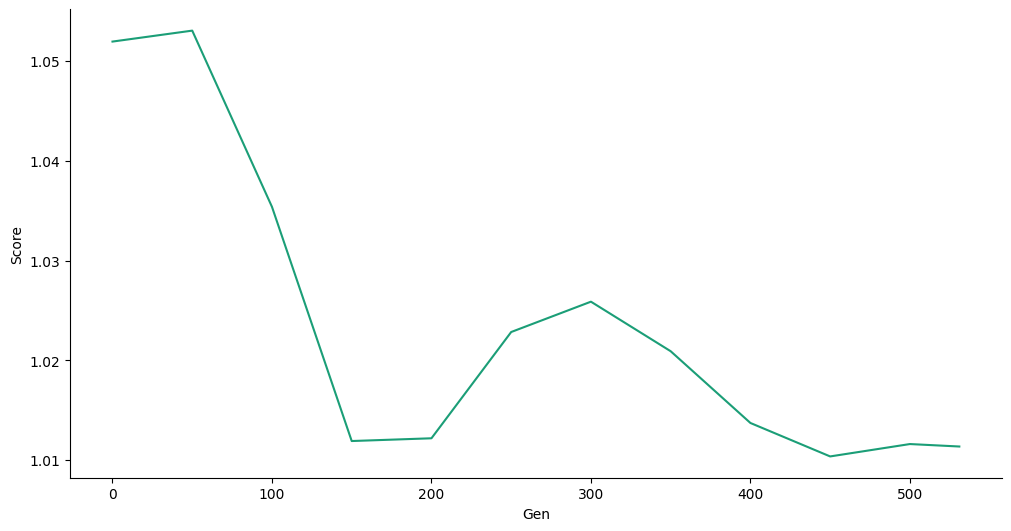

In [ ]:
# @title Gen vs Score

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gen']
  ys = series['Score']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Gen', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gen')
_ = plt.ylabel('Score')